Introduction

Influenza, commonly known as the flu, is a contagious respiratory illness that can lead to hospitalization or even death due to associated complications. High-risk groups include individuals aged 65 and above, those with underlying health conditions, and young children. Annual vaccination against seasonal flu is recommended by health authorities worldwide, including the Centers for Disease Control and Prevention (CDC), which advises vaccination for everyone aged six months and older.

The H1N1 influenza pandemic emerged in 2009, originating from the influenza A virus in the United States.

Problem Statement
As the global effort to vaccinate against COVID-19 continues, understanding people's attitudes, behaviors, and backgrounds regarding seasonal flu vaccination is crucial. Vaccine hesitancy, driven by vaccine safety and efficacy concerns, poses a significant challenge to public health efforts. Individuals’ vaccination decisions are influenced by personal beliefs, social contexts, and evolving perceptions overtime.

Main Objective
This project aims to develop a predictive model for seasonal flu vaccine uptake based on demographic, behavioral, and attitudinal factors.

Specific Objectives
1. Impact of Education Level: Investigate whether education level influences the likelihood of receiving the seasonal flu vaccine.

2. Effect of Age and Employment: Examine how age and employment status affect the likelihood of seasonal flu vaccine uptake.

3. Role of Concern and Knowledge about H1N1: Assess the relationship between levels of concern and knowledge about the H1N1 flu and the likelihood of receiving the seasonal flu vaccine.
.

In [107]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [108]:
# loading the data
data_features = pd.read_csv('training_set_features.csv') # predictors
data_target = pd.read_csv('training_set_labels.csv') # target

In [109]:
data_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [110]:
data_target.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [111]:
# Combining the two datasets
df = pd.concat([data_features, data_target], axis=1) # combining target and predictor data

Data Exploration
The datasets used for this project were downloaded from Driven Data. The original data source is the National 2009 H1N1 Flu Survey (NHFS. 

Two data setsaree merged training_set_features containing information about the respondents, such as knowledge about H1N1, behavioral habits, and demographic details, and 
training_se_latbela pgovides the target variables for each respondent, indicating whether they received the H1N1 vaccine (h1n1_vaccine) and the seasonal vaccine (seasonal_vaccine It contains information on the social,economic,  and demographic backgrounds of the respondents as well as their opinions on the H1N1 and seasonal flu vaccines. The datasets have been divided into the training set features and the training set labels. The training data has 26707 rows and 36 columns.).

In [112]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


In [113]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'respondent_id', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [114]:
df.shape

(26707, 39)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [116]:
# showing a transposed DataFrame where descriptive statistics are arranged by columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [117]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

From the above output there are two "respondent_id". This is as a result of concating the two datasets "features and labels".
This will be dropped when cleaning the data. 

In [118]:
race_column = df['race'].value_counts()
race_column

race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64

In [119]:
sex_column = df['sex'].value_counts()
sex_column

sex
Female    15858
Male      10849
Name: count, dtype: int64

Summary of the dataset
From the datasets, there are four race groups; white, black, hispanic, and others. The majority was white. The female population was at higher than male at 15858 while 10849 for the male. 

Data Cleaning 

In [142]:
# dropping the respondent_id column and checking for duplicates

df.duplicated().sum()

0

As per the above results, there are no duplicate data. 

In [143]:
# check missing values
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In the results above, the columns with no missing data are race, sex, age_group while the ones with the most missing data are health_insurance, employment industry and occupation. Some missing data might be due to sensitivity on the kind of information requested. Such information include health insurance and employment. 


In [122]:
# removing variables that are not useful and have many null values
df.drop(["employment_industry", "employment_occupation"], axis =1, inplace=True)

In [123]:
# Proportion of those that are vaccinated
vaccinated = df[['seasonal_vaccine', 'h1n1_vaccine']].sum()/len(df)
vaccinated


seasonal_vaccine    0.465608
h1n1_vaccine        0.212454
dtype: float64

In [124]:
# Porportion of those not vaccinated
vaccinated_not = 1 - df[['seasonal_vaccine', 'h1n1_vaccine']].sum()/len(df)
vaccinated_not

seasonal_vaccine    0.534392
h1n1_vaccine        0.787546
dtype: float64

The results above show that the variables seasonal_vaccine is balanced and h1n1_vaccine is unbalanced, that is, there is significant difference in the number individuals vaccinated against those unvaccinated. The implication of this is that unbalanced variables affects the performance of predictive models. As h1n1 is unbalanced, we will use seasonal_vaccine for the analysis.

In [125]:
# dropping hini_vaccinated as it is unbalanced
df.drop(["h1n1_vaccine"], axis=1, inplace=True)

In [144]:
# checking the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

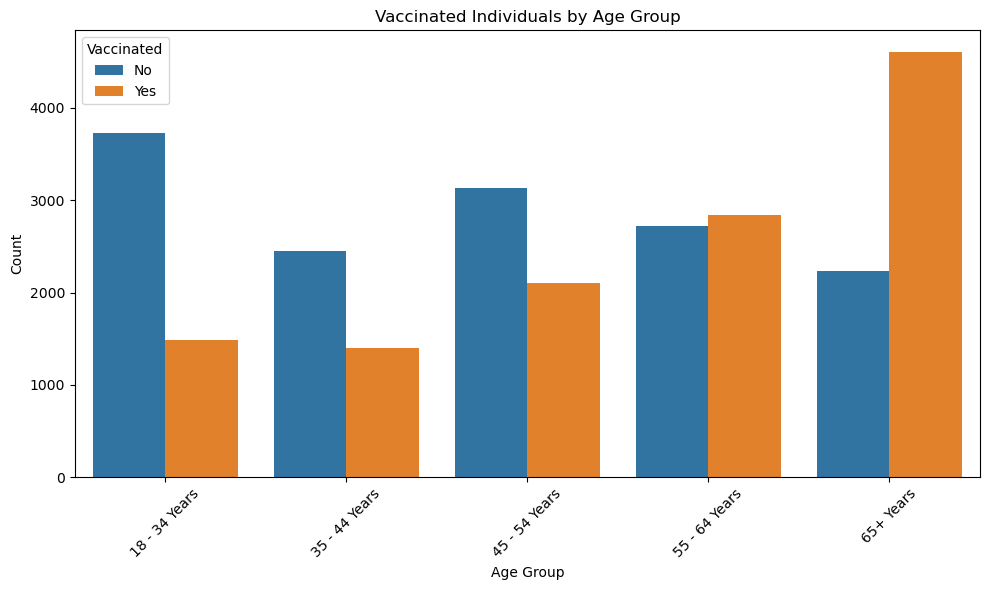

In [127]:
# Sort age_group in ascending order
age_groups_sorted = df['age_group'].unique()
age_groups_sorted.sort()

# Filter for vaccinated individuals
vaccinated_data = df[df['seasonal_vaccine'] == 1]

# Visualize vaccinated individuals by age group using hue
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='seasonal_vaccine', data=df, order=age_groups_sorted)
plt.title('Vaccinated Individuals by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Vaccinated', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

The 65+ age group has the highest proportion of vaccinated individuals, while the 18-34 age group has the highest proportion of unvaccinated individuals.

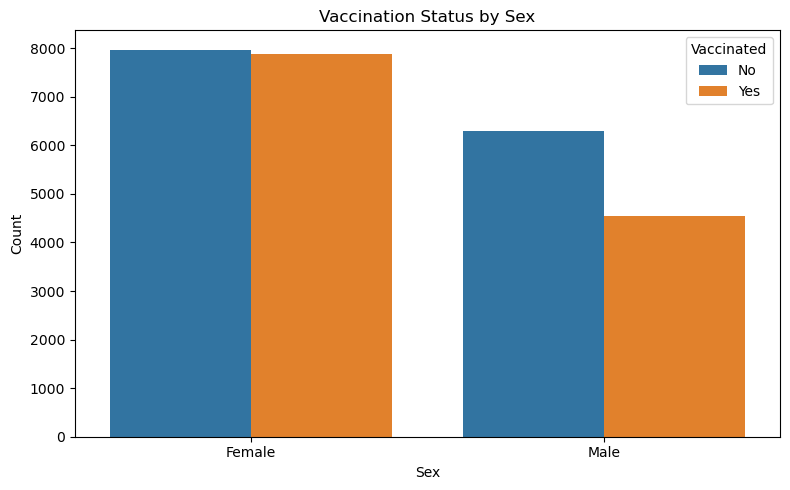

In [128]:
df = pd.concat([data_features, data_target['seasonal_vaccine']], axis=1)

# Visualize vaccinated individuals by sex
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='seasonal_vaccine', data=df, )
plt.title('Vaccination Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Vaccinated', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

The count of unvaccinated females is slightly higher than the count of vaccinated females.The unvaccinated females are around 8000 while the vaccinated females are just slightly less than 8000, approximately 7800.The count of unvaccinated males is significantly higher than the count of vaccinated males.
The unvaccinated males are approximately 6500 and the vaccinated males are about 4800.

Among females, the difference between vaccinated and unvaccinated individuals is minimal, suggesting a relatively balanced distribution while among males, there is a more noticeable difference, with a higher number of unvaccinated males compared to vaccinated males.
The proportion of vaccinated individuals is higher in females compared to males. Overall, the males show a lower overall vaccination rate compared to females.

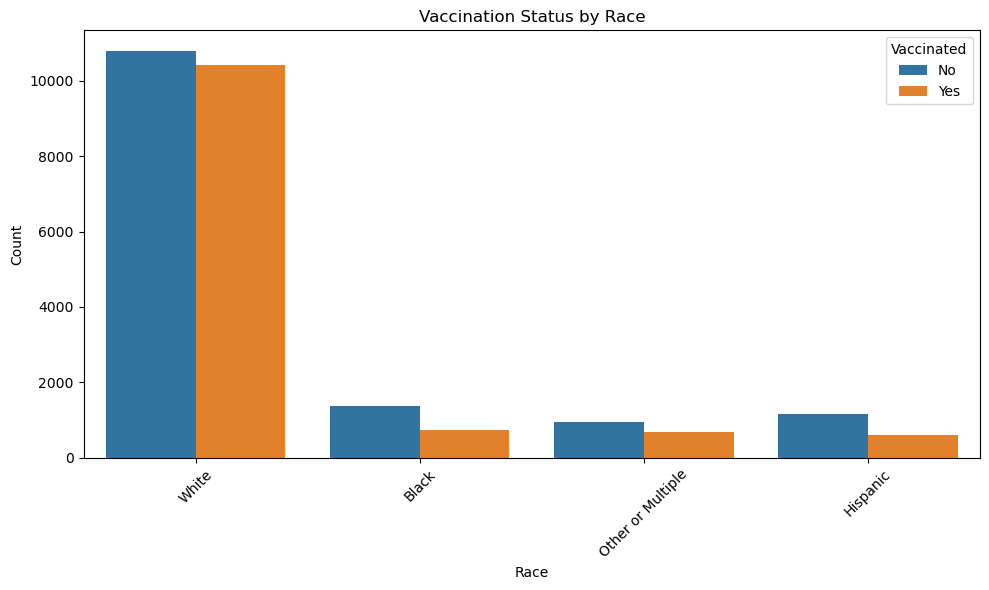

In [153]:
# Visualize vaccinated individuals by race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='seasonal_vaccine', data=df, )
plt.title('Vaccination Status by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Vaccinated', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There are disparities in vaccination rates among different racial groups, with the White racial group having higher vaccination rates compared to other groups. The lower vaccination rates in the Black, Other or Multiple, and Hispanic groups indicate potential areas for targeted public health interventions to increase vaccination coverage.

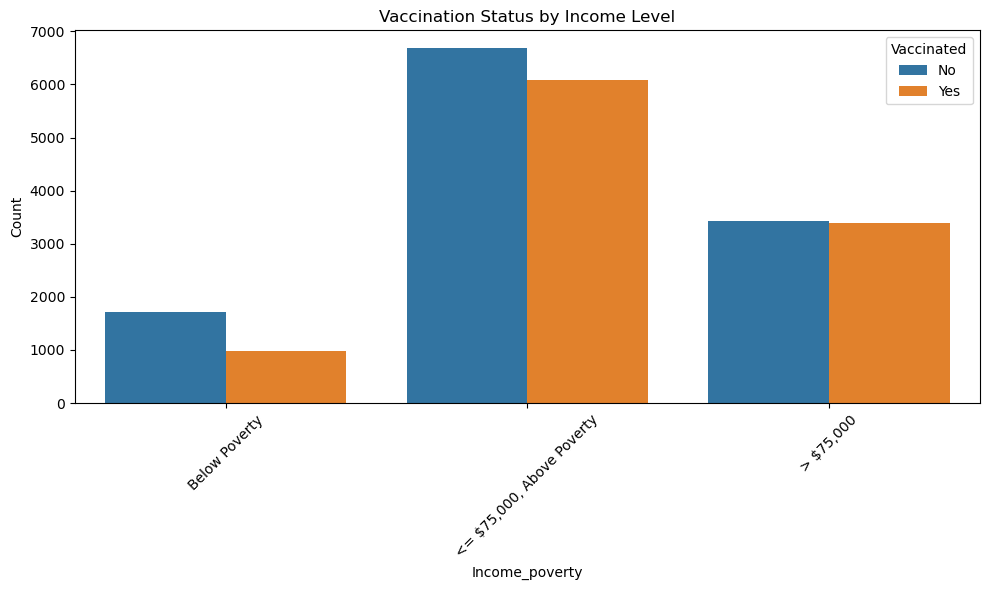

In [130]:
# Visualize vaccinated individuals by Income Level
plt.figure(figsize=(10, 6))
sns.countplot(x='income_poverty', hue='seasonal_vaccine', data=df, )
plt.title('Vaccination Status by Income Level')
plt.xlabel('Income_poverty')
plt.ylabel('Count')
plt.legend(title='Vaccinated', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

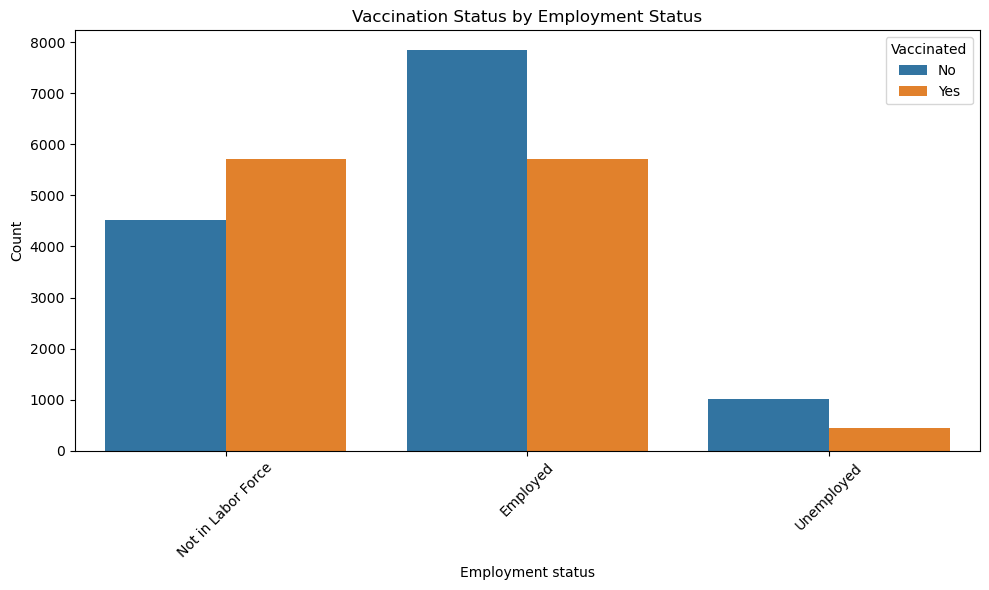

In [183]:
# Visualize vaccinated individuals by Employment Status
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_status', hue='seasonal_vaccine', data=df, )
plt.title('Vaccination Status by Employment Status')
plt.xlabel('Employment status')
plt.ylabel('Count')
plt.legend(title='Vaccinated', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

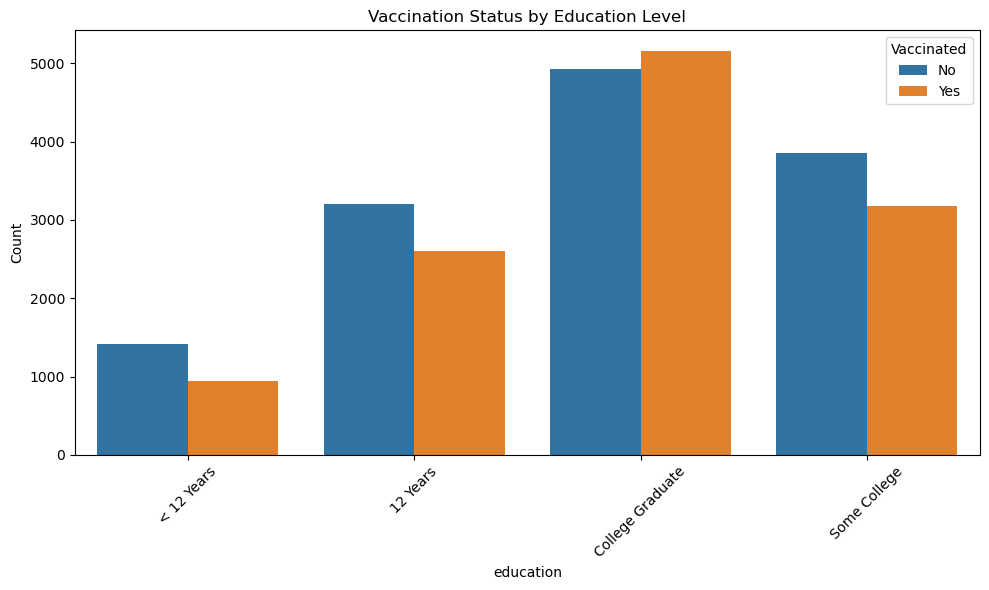

In [185]:
# Visualize vaccinated individuals by education level
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='seasonal_vaccine', data=df, )
plt.title('Vaccination Status by Education Level')
plt.xlabel('education')
plt.ylabel('Count')
plt.legend(title='Vaccinated', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Do people's opinions influence seasonal flu vaccine uptake?

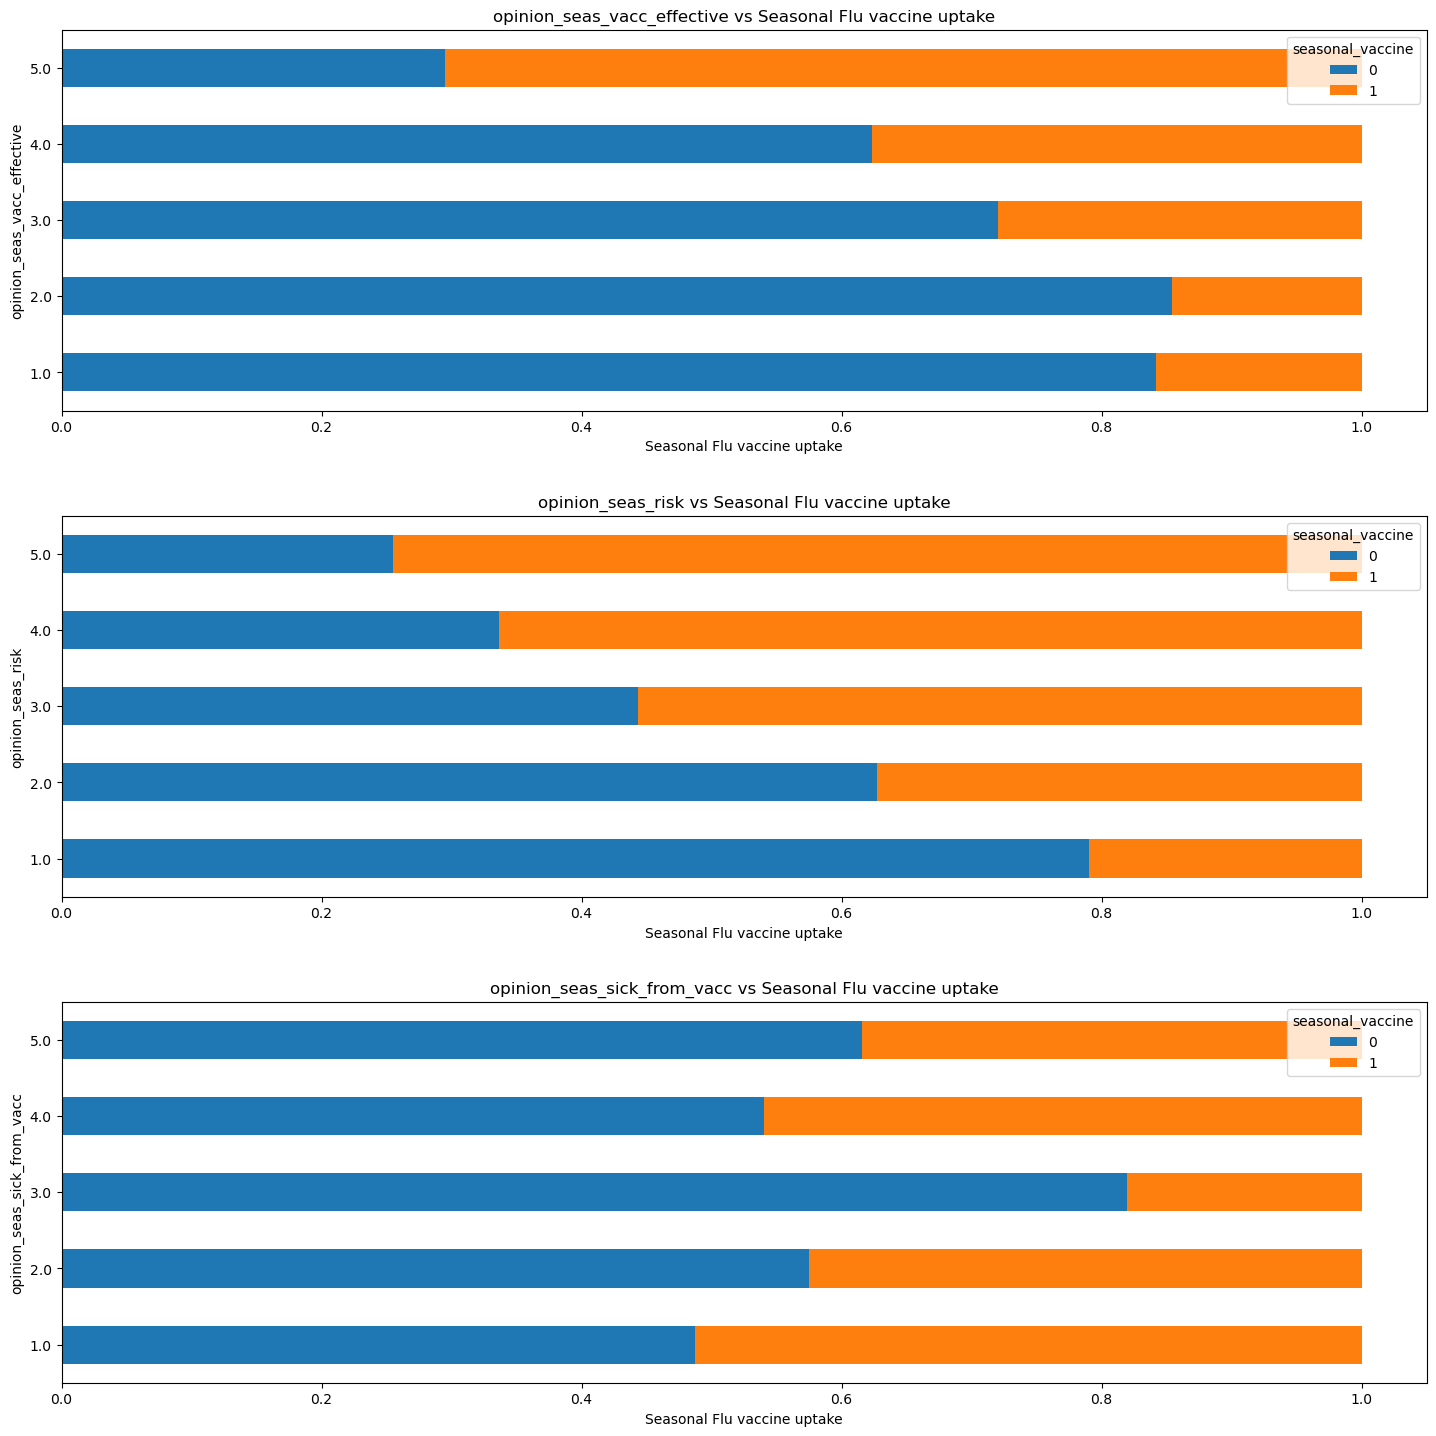

In [133]:
fig,axes = plt.subplots(figsize = (15,15),nrows = 3)
features_to_plot = ['opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',]

for idx,col in enumerate(features_to_plot):
    ax = axes[idx]
    crosstab1 = pd.crosstab(df[col],df['seasonal_vaccine'],normalize="index")
    crosstab1.plot(kind = "barh",stacked = True,ax = ax)
    ax.set_xlabel("Seasonal Flu vaccine uptake")
    ax.set_title(f"{col} vs Seasonal Flu vaccine uptake")

fig.tight_layout(pad=3);

People that believe in the effectiveness of the seasonal flu vaccine are more likely to take it while those that are also more cautious about the risk of catching the flu without the vaccine are also more likely to take it.`

Modeling 

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


One Hot Encoding
All the columns with the float and integer data types are categorical thus necessitating their change into the category data type in preparation for one hot encoding. 

In [146]:
# Define feature columns and target column
feature_columns = df.columns.drop(['respondent_id','seasonal_vaccine'])
target_column = 'seasonal_vaccine'


In [147]:
# Split data into predictors and target:
X = df[feature_columns]
y = df[target_column]


In [148]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [151]:
from sklearn.pipeline import Pipeline
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Preprocessing for numerical data: impute missing values and scale features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [ ]:
y_pred = model.predict(X_test)


In [140]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 78.53%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2891
           1       0.78      0.75      0.76      2451

    accuracy                           0.79      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.79      0.79      0.78      5342

Confusion Matrix:
[[2369  522]
 [ 625 1826]]


In [158]:
#Q1

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


#Here I narrow down the training data frame to the two variables I am investigating
X_train_q1 = X_train[['h1n1_concern','h1n1_knowledge']]
X_test_q1 = X_test[['h1n1_concern','h1n1_knowledge']]


#Here I use one hot encoding
X_train_q1 = pd.get_dummies(X_train_q1, columns=['h1n1_concern','h1n1_knowledge'])
X_test_q1 = pd.get_dummies(X_test_q1, columns=['h1n1_concern','h1n1_knowledge'])


# Fit logistic regression - training
logreg = LogisticRegression()
logreg.fit(X_train_q1, y_train)


#Predicting - on Testing data
q1_y_pred = logreg.predict(X_test_q1)

#Measure the accuracy
accuracy = accuracy_score(y_test, q1_y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)


report = classification_report(y_test, q1_y_pred)

# Print the classification report
print(report)

Accuracy: 0.5937850992137776
              precision    recall  f1-score   support

           0       0.60      0.77      0.67      2891
           1       0.59      0.38      0.46      2451

    accuracy                           0.59      5342
   macro avg       0.59      0.58      0.57      5342
weighted avg       0.59      0.59      0.58      5342



In [162]:
# Split the data into features and target variable
X = df[['h1n1_concern', 'h1n1_knowledge']]
y_seasonal = df['seasonal_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

# Here I use one hot encoding
X_train_q1 = pd.get_dummies(X_train, columns=['h1n1_concern','h1n1_knowledge'])
X_test_q1 = pd.get_dummies(X_test, columns=['h1n1_concern','h1n1_knowledge'])

# Fit logistic regression - training
logreg = LogisticRegression()
logreg.fit(X_train_q1, y_train_seasonal)

# Predicting - on Testing data
q1_y_pred_seasonal = logreg.predict(X_test_q1)

# Measure the accuracy
accuracy_seasonal = accuracy_score(y_test_seasonal, q1_y_pred_seasonal)

# Print the accuracy score
print("Seasonal Vaccine Accuracy:", accuracy_seasonal)

# Print the classification report
report_seasonal = classification_report(y_test_seasonal, q1_y_pred_seasonal)
print(report_seasonal)


Seasonal Vaccine Accuracy: 0.5937850992137776
              precision    recall  f1-score   support

           0       0.60      0.77      0.67      2891
           1       0.59      0.38      0.46      2451

    accuracy                           0.59      5342
   macro avg       0.59      0.58      0.57      5342
weighted avg       0.59      0.59      0.58      5342



The accuracy of 59.38% suggests that the model's predictions are slightly better than random guessing but not highly accurate.
Precision and recall values indicate that the model performs better at identifying class 0 (higher precision and recall) compared to class 1.
The lower recall for class 1 (0.38) suggests that the model struggles more to identify instances of class 1 compared to class 0 correctly.
The weighted average F1-score of 0.58 indicates moderate overall performance, considering the balance between precision and recall.


Further refinement of the model or exploration of additional features or algorithms may be necessary to improve its performance, particularly in correctly identifying class 1 instances. 
One way is by Hyperparameter tuning as below:


In [168]:


# Select relevant features
features = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
            'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
            'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1',
            'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 
            'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 
            'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 
            'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 
            'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 
            'hhs_geo_region', 'census_msa', 'household_adults', 'household_children']

# Handle missing data by imputing
imputer = SimpleImputer(strategy='most_frequent')

# Split the data into features and target variable
X = df[features]
y_seasonal = df['seasonal_vaccine']

# Impute missing values
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=features)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train_seasonal, y_test_seasonal = train_test_split(X_encoded, y_seasonal, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()

# Logistic Regression with hyperparameter tuning
pipeline = Pipeline([
    ('scaler', scaler),
    ('logreg', LogisticRegression(max_iter=10000))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_seasonal)

# Predicting - on Testing data
q1_y_pred_seasonal = grid_search.predict(X_test)

# Measure the accuracy
accuracy_seasonal = accuracy_score(y_test_seasonal, q1_y_pred_seasonal)

# Print the accuracy score
print("Seasonal Vaccine Accuracy:", accuracy_seasonal)

# Print the classification report
report_seasonal = classification_report(y_test_seasonal, q1_y_pred_seasonal)
print(report_seasonal)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Seasonal Vaccine Accuracy: 0.7837888431299139
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2891
           1       0.77      0.75      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342

Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


The model has an overall accuracy of 78.38%, meaning it correctly predicts the seasonal vaccine outcome 78.38% of the time. Precision and recall values around 0.75 to 0.81 indicate that the model is balanced in its ability to correctly identify both classes (0 and 1) of the outcome.
The F1-score of 0.78 shows a moderate level of overall model performance, considering both precision and recall.

Conclusion and Recommendations

Education Level: Vaccination rates are higher among those with higher education. Efforts should be made to target awareness campaigns to those with lower educational levels, possibly using easily accessible and understandable formats.

Income and Poverty: There's a need for targeted campaigns in areas with higher poverty rates, possibly combined with subsidies or free vaccination programs to encourage higher vaccination rates among this demographic.

Targeted Interventions:
Race: There's a notable disparity in vaccination rates among racial groups. Targeted interventions and campaigns should be developed to address the specific concerns and barriers faced by the racial groups with lower vaccination rates. Sex: While the difference is slight, efforts can be made to ensure that both males and females have equal access to information and vaccination opportunitie

s